# Exploratory Data Analysis of the Breast Cancer Dataset

## Starting point
We will perform an EDA on the Breast Cancer Dataset, downloading it from the sklearn library.
We will use the numpy and pandas libraries as our Data Analysis tools. And we will use seaborn and matplotlib as out Plotting tools.
Once we load the dataset, we will convert it to a dataframe using pandas and we'll apply some basic commands in order to quickly analyze the overall data.

In [1]:
# Import necessary libraries
from sklearn import datasets
# Data Analysis Tools
import numpy as np
import pandas as pd
#Plotting Tools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Breast Cancer Dataset
bc=datasets.load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
#Creating our dataframe with the appropriate values
bc_data=pd.DataFrame(bc.data,columns= bc.feature_names)
bc_data['tumor']=bc.target
bc_data.columns=bc_data.columns.str.replace(" ","_")
bc_data.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst_symmetry  worst_fractal_dimension  tumor  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

In [4]:
# Defining a function to fill in the categorical values of the tumor and identify if it's malignant or no
def tumors(value):
    cancer=bc.target_names[value]
    return cancer

bc_data.tumor=bc_data.tumor.apply(tumors)
bc_data.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst_symmetry  worst_fractal_dimension      tumor  
0          0.4601                  0.11890  malignant  
1          0.2750                  0.08902  malignant  
2          0.3613                  0.08758  malignant  
3          0.6638                  0.17300  malignant  
4          0.2364                  0.07678  malignant  

[5 rows x 31 columns]

## Univariate Analysis

On this analysis we'll show overall statistics of the dataset, such as its:
    - size,
    - number of observations,
    - number of columns, 
    - name of columns, 
    - mean of each column, 
    - standard deviation of each column, 
    - the minimum values of each column,
    - the maximum values of each column, 
    - number of malignant and benign tumors,
    - duplicated values, 
and a few others, to help us better understand the provided data.

In [5]:
# Data Size
bc_shape=bc_data.shape

print('Number of observations = ', bc_shape[0])
print('Number of columns = ', bc_shape[1])

# Data Columns
bc_columns = bc_data.columns.tolist()
print('Columns: ', bc_columns)

Number of observations =  569
Number of columns =  31
Columns:  ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'texture_error', 'perimeter_error', 'area_error', 'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error', 'symmetry_error', 'fractal_dimension_error', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension', 'tumor']


In [6]:
# Data Characteristics
bc_data.describe().T

count        mean         std         min  \
mean_radius              569.0   14.127292    3.524049    6.981000   
mean_texture             569.0   19.289649    4.301036    9.710000   
mean_perimeter           569.0   91.969033   24.298981   43.790000   
mean_area                569.0  654.889104  351.914129  143.500000   
mean_smoothness          569.0    0.096360    0.014064    0.052630   
mean_compactness         569.0    0.104341    0.052813    0.019380   
mean_concavity           569.0    0.088799    0.079720    0.000000   
mean_concave_points      569.0    0.048919    0.038803    0.000000   
mean_symmetry            569.0    0.181162    0.027414    0.106000   
mean_fractal_dimension   569.0    0.062798    0.007060    0.049960   
radius_error             569.0    0.405172    0.277313    0.111500   
texture_error            569.0    1.216853    0.551648    0.360200   
perimeter_error          569.0    2.866059    2.021855    0.757000   
area_error               569.0   40.337079   45.491006    6.802000   
smoothness_error         569.0    0.007041    0.003003    0.001713   
compactness_error        569.0    0.025478    0.017908    0.002252   
concavity_error          569.0    0.031894    0.030186    0.000000   
concave_points_error     569.0    0.011796    0.006170    0.000000   
symmetry_error           569.0    0.020542    0.008266    0.007882   
fractal_dimension_error  569.0    0.003795    0.002646    0.000895   
worst_radius             569.0   16.269190    4.833242    7.930000   
worst_texture            569.0   25.677223    6.146258   12.020000   
worst_perimeter          569.0  107.261213   33.602542   50.410000   
worst_area               569.0  880.583128  569.356993  185.200000   
worst_smoothness         569.0    0.132369    0.022832    0.071170   
worst_compactness        569.0    0.254265    0.157336    0.027290   
worst_concavity          569.0    0.272188    0.208624    0.000000   
worst_concave_points     569.0    0.114606    0.065732    0.000000   
worst_symmetry           569.0    0.290076    0.061867    0.156500   
worst_fractal_dimension  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
mean_radius               11.700000   13.370000    15.780000    28.11000  
mean_texture              16.170000   18.840000    21.800000    39.28000  
mean_perimeter            75.170000   86.240000   104.100000   188.50000  
mean_area                420.300000  551.100000   782.700000  2501.00000  
mean_smoothness            0.086370    0.095870     0.105300     0.16340  
mean_compactness           0.064920    0.092630     0.130400     0.34540  
mean_concavity             0.029560    0.061540     0.130700     0.42680  
mean_concave_points        0.020310    0.033500     0.074000     0.20120  
mean_symmetry              0.161900    0.179200     0.195700     0.30400  
mean_fractal_dimension     0.057700    0.061540     0.066120     0.09744  
radius_error               0.232400    0.324200     0.478900     2.87300  
texture_error              0.833900    1.108000     1.474000     4.88500  
perimeter_error            1.606000    2.287000     3.357000    21.98000  
area_error                17.850000   24.530000    45.190000   542.20000  
smoothness_error           0.005169    0.006380     0.008146     0.03113  
compactness_error          0.013080    0.020450     0.032450     0.13540  
concavity_error            0.015090    0.025890     0.042050     0.39600  
concave_points_error       0.007638    0.010930     0.014710     0.05279  
symmetry_error             0.015160    0.018730     0.023480     0.07895  
fractal_dimension_error    0.002248    0.003187     0.004558     0.02984  
worst_radius              13.010000   14.970000    18.790000    36.04000  
worst_texture             21.080000   25.410000    29.720000    49.54000  
worst_perimeter           84.110000   97.660000   125.400000   251.20000  
worst_area               515.300000  686.500000  1084.

In [7]:
# Data (Storage) Type
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean_radius                569 non-null float64
mean_texture               569 non-null float64
mean_perimeter             569 non-null float64
mean_area                  569 non-null float64
mean_smoothness            569 non-null float64
mean_compactness           569 non-null float64
mean_concavity             569 non-null float64
mean_concave_points        569 non-null float64
mean_symmetry              569 non-null float64
mean_fractal_dimension     569 non-null float64
radius_error               569 non-null float64
texture_error              569 non-null float64
perimeter_error            569 non-null float64
area_error                 569 non-null float64
smoothness_error           569 non-null float64
compactness_error          569 non-null float64
concavity_error            569 non-null float64
concave_points_error       569 non-null float64
symmetry_error             569 

In [8]:
# Null and NaN Values
print(bc_data.isnull().sum())
print(bc_data.isna().sum())

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
tumor                      0
dtype: int64
mean_radius                0
mean_texture               0
mean_perimeter             0
m

In [9]:
# Variable Balance
bc_data.tumor.value_counts()

benign       357
malignant    212
Name: tumor, dtype: int64

## What we learned so far
Now we know we're evaluating 569 tumors with 30 characteristics each. These are divided in 357 benign tumors and 212 malignant tumors. We also know we have 10 'mean' measurements, 10 'error' measurements and 10 'worst' measurements. We can already see 30 characteristics is going to be too much to study all at once, but we also recognized 3 types of characteristics that directly relate to each other. Now we'll display histograms and boxplots for each characteristic provided.

In [10]:
# Variable Distribution via histograms
def hist(dataframe,a,b):
    plt.rcParams['figure.figsize']=(20,15)
    dataframe.hist()
    plt.suptitle('Histograms')
    plt.show()

In [11]:
# Variable Distribution via boxplots
def box_plot(dataframe, a,b):
    plt.rcParams['figure.figsize']=(20,15)
    dataframe.boxplot(rot=(90))
    plt.title('Boxplot')
    plt.show()

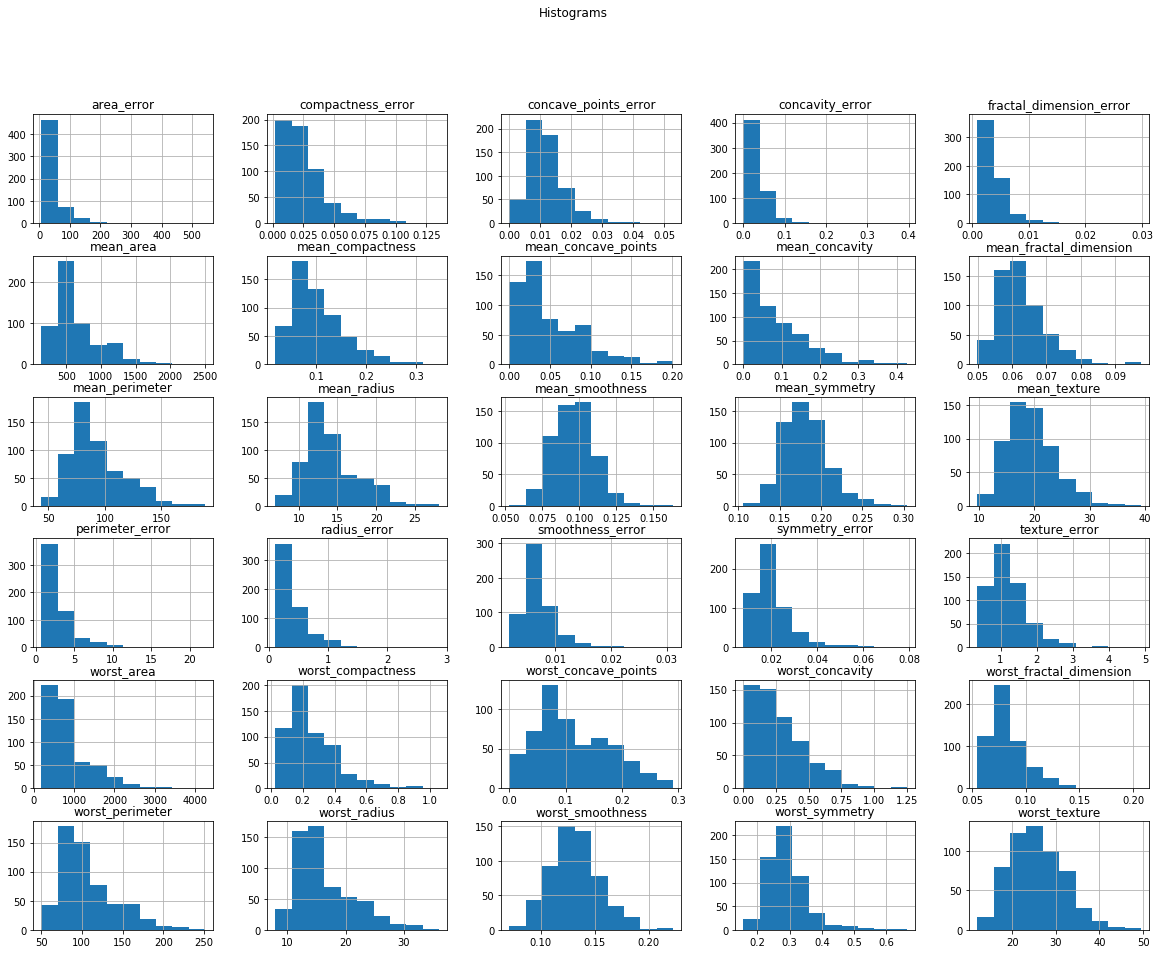

In [12]:
hist(bc_data, 10,5)

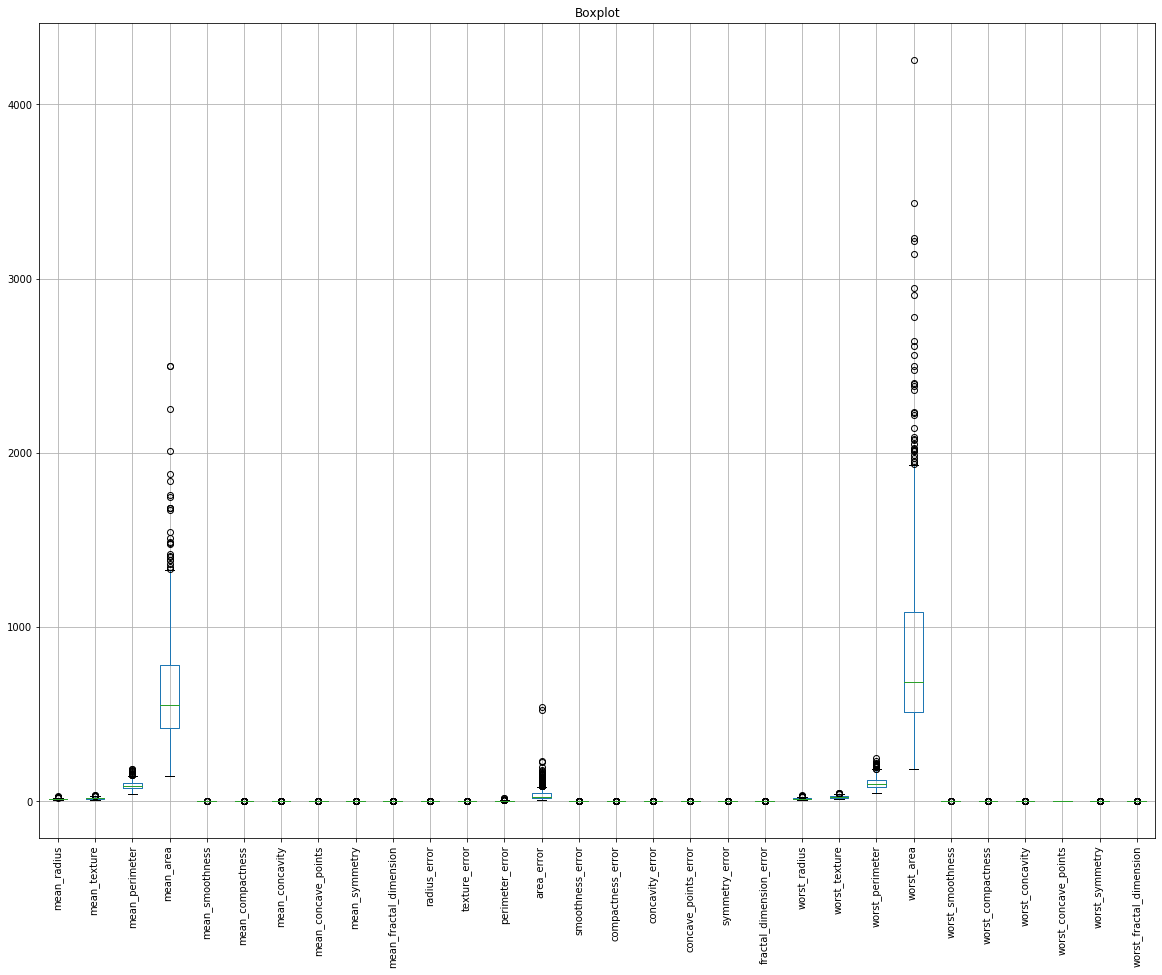

In [13]:
box_plot(bc_data, 15,10)

In [14]:
# Seaborn Distribution
def tables(dataframe, key='tumor'):
    for column in dataframe.columns[:(len(dataframe.columns)-1)]:
        g = sns.FacetGrid(dataframe, hue = key)
        g = g.map(sns.distplot,column)
        g = g.add_legend()
        plt.show()

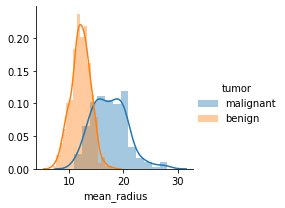

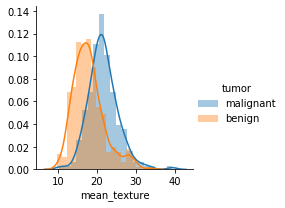

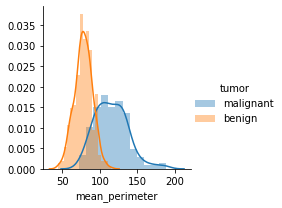

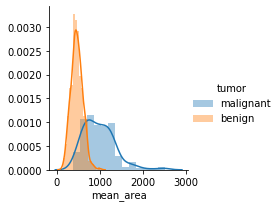

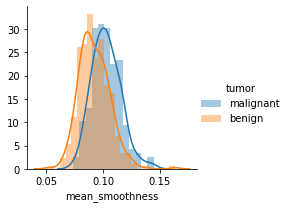

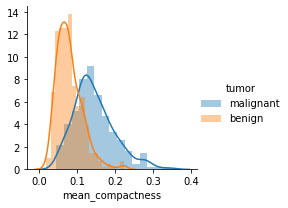

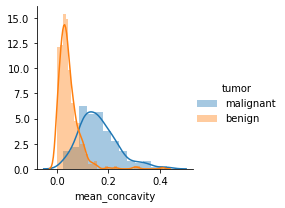

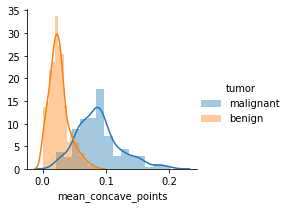

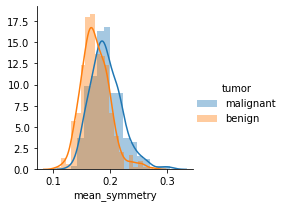

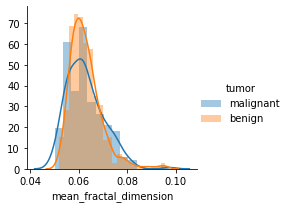

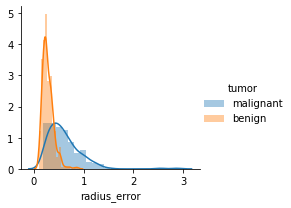

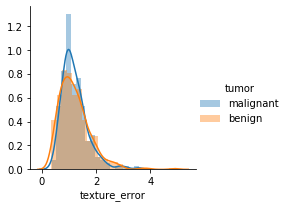

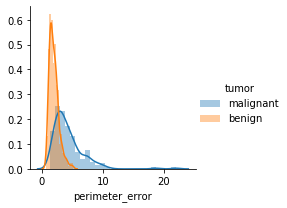

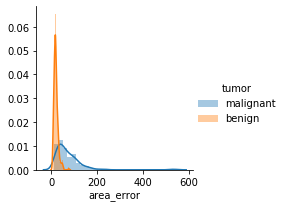

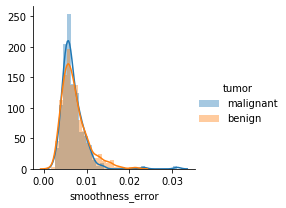

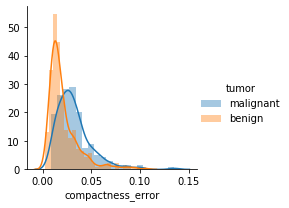

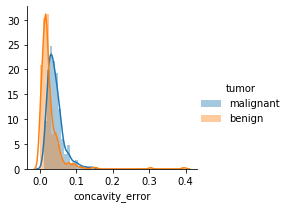

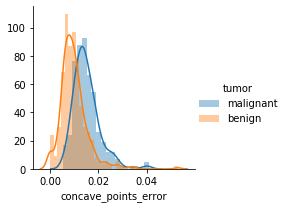

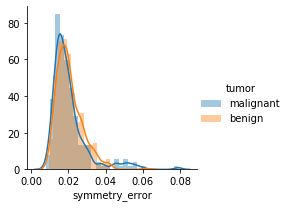

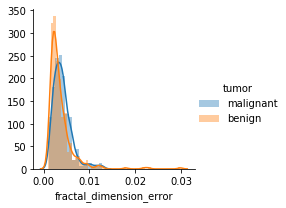

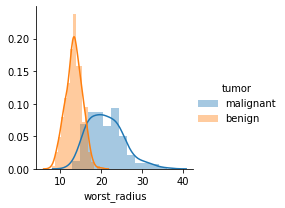

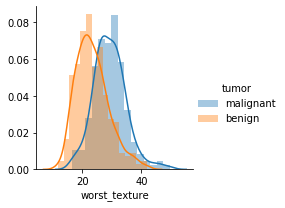

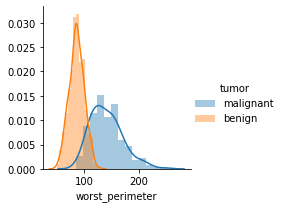

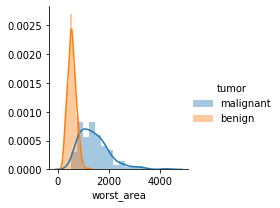

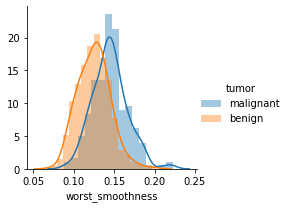

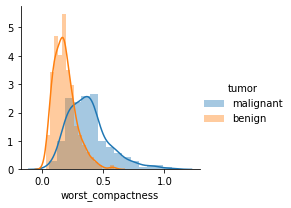

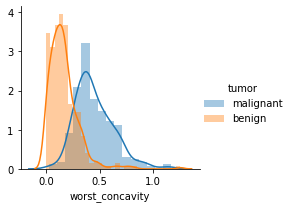

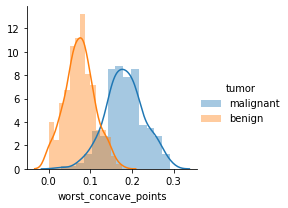

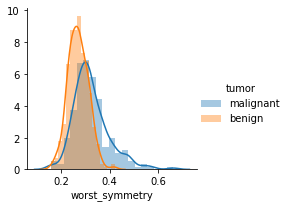

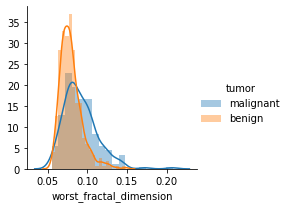

In [15]:
tables(bc_data)


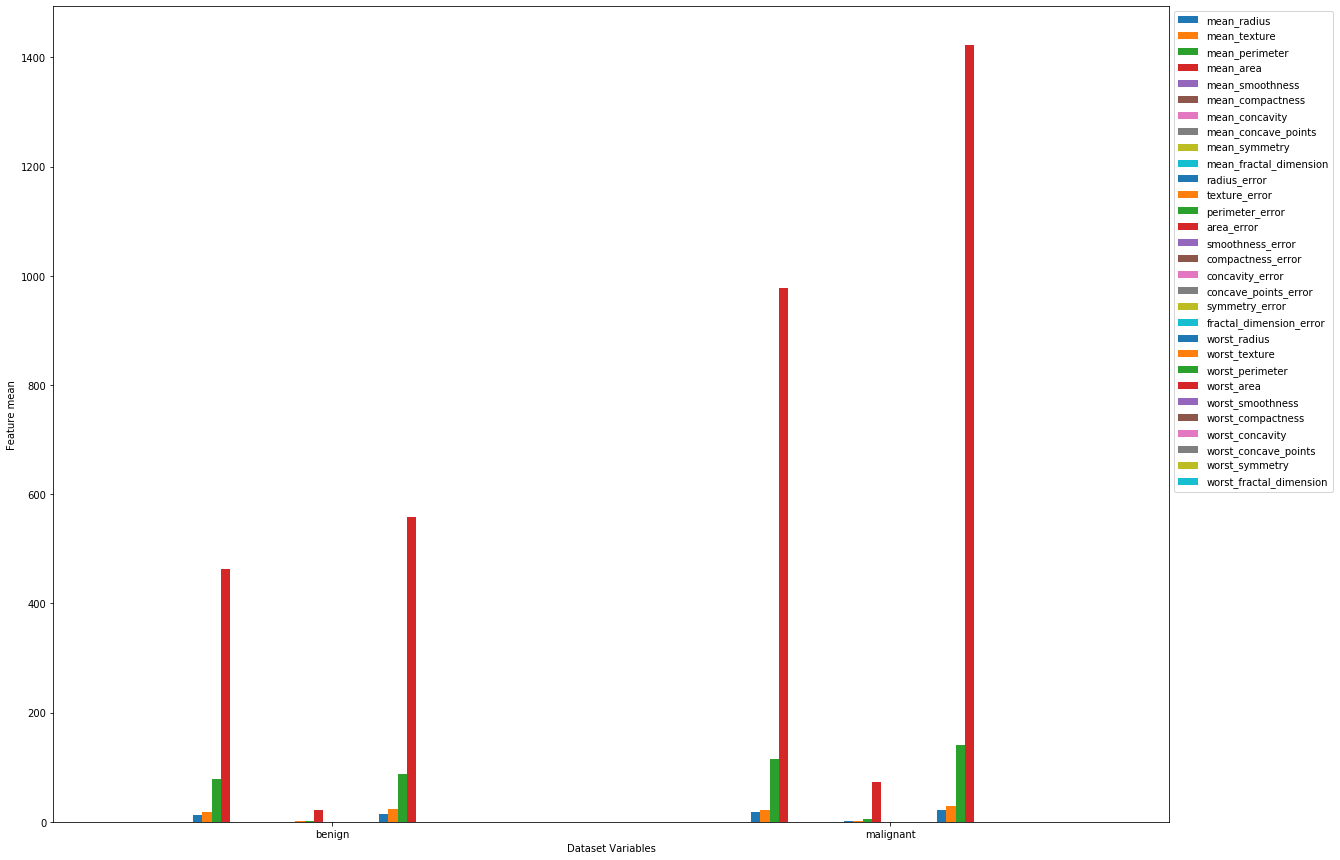

In [16]:
bc_data.groupby('tumor').mean().plot(kind='bar')
plt.ylabel('Feature mean')
plt.xlabel('Dataset Variables')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [17]:
bc_data.loc[bc_data.duplicated()]

Empty DataFrame
Columns: [mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness, mean_compactness, mean_concavity, mean_concave_points, mean_symmetry, mean_fractal_dimension, radius_error, texture_error, perimeter_error, area_error, smoothness_error, compactness_error, concavity_error, concave_points_error, symmetry_error, fractal_dimension_error, worst_radius, worst_texture, worst_perimeter, worst_area, worst_smoothness, worst_compactness, worst_concavity, worst_concave_points, worst_symmetry, worst_fractal_dimension, tumor]
Index: []

[0 rows x 31 columns]

### Conclusions of the Univariate Analysis
It's still hard to study, but we can see some relation in the variables and the resulting tumor, such as worst_convcave_points, where the tumors seem to diverge and have different means and medians through the histograms generated.This means it could be a really important characteristic to look at when studying tumors. On the other hand boxplots show us that in worst_radius we have a ton of outliers, therefore making it a touchy study subject that needs to be taken carefully.

## Multivariable Analysis

Since it still isn't very clear what variables we should take in to account because we have 30 characteristics, we'll just show the correlation in general and then decide what to do with the acquired information.

In [18]:
# Creating correlation matrix
def plot_corr(frame,a,b,c=10):
    # Correlation Matrix
    plt.rcParams['figure.figsize']=(a,b)
    correlation_matrix=frame.corr()

    # Heatmap
    mask = np.zeros_like(correlation_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    a=sns.heatmap(correlation_matrix,
                cmap='coolwarm',
                annot=True,
                mask=mask)
    a.set_ylim(c,-1)
    plt.show()

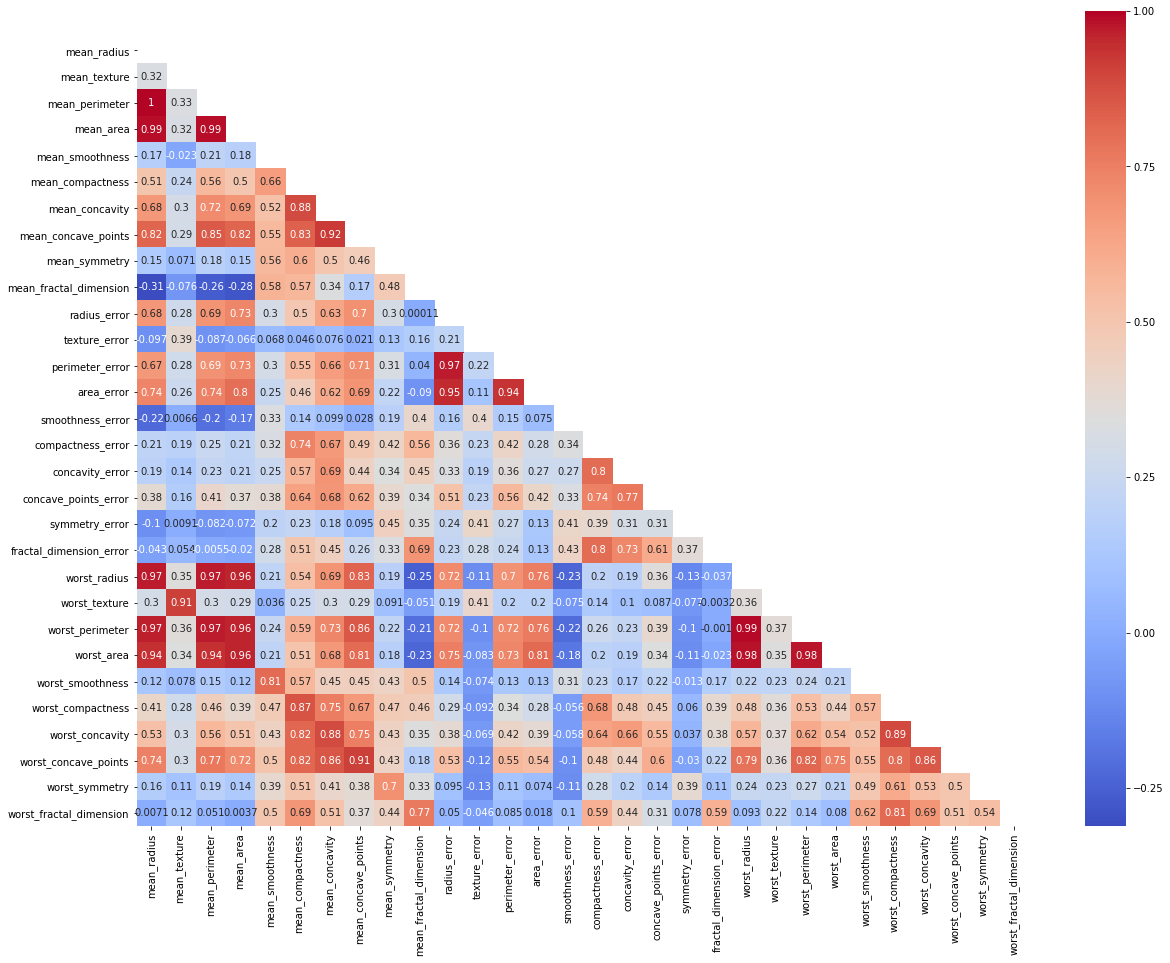

In [19]:
plot_corr(bc_data, 20, 15,30)

## Frame Filtering

Since the correlation matrix is way too big, we decided to cautiosly divide the dataframe into 3, based on what they measured: means, errors and worst.

In [20]:
# Creating dataframes
meandf=bc_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'tumor']]
errordf=bc_data[['radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error','tumor']]
worsedf=bc_data[['worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension','tumor']]

In [21]:
# Function to show realtions between two different characteristics in respect to the types of tumor
def useful_corr(frame,target,data1,data2):
    #which ones to use
    g = sns.FacetGrid(frame, hue = target)
    g = g.map(plt.scatter, data1, data2)
    g = g.add_legend()
    plt.show()

### Mean Filters

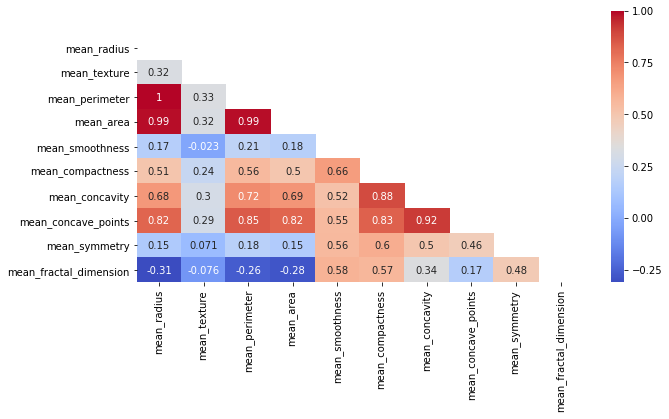

In [22]:
plot_corr(meandf,10,5)

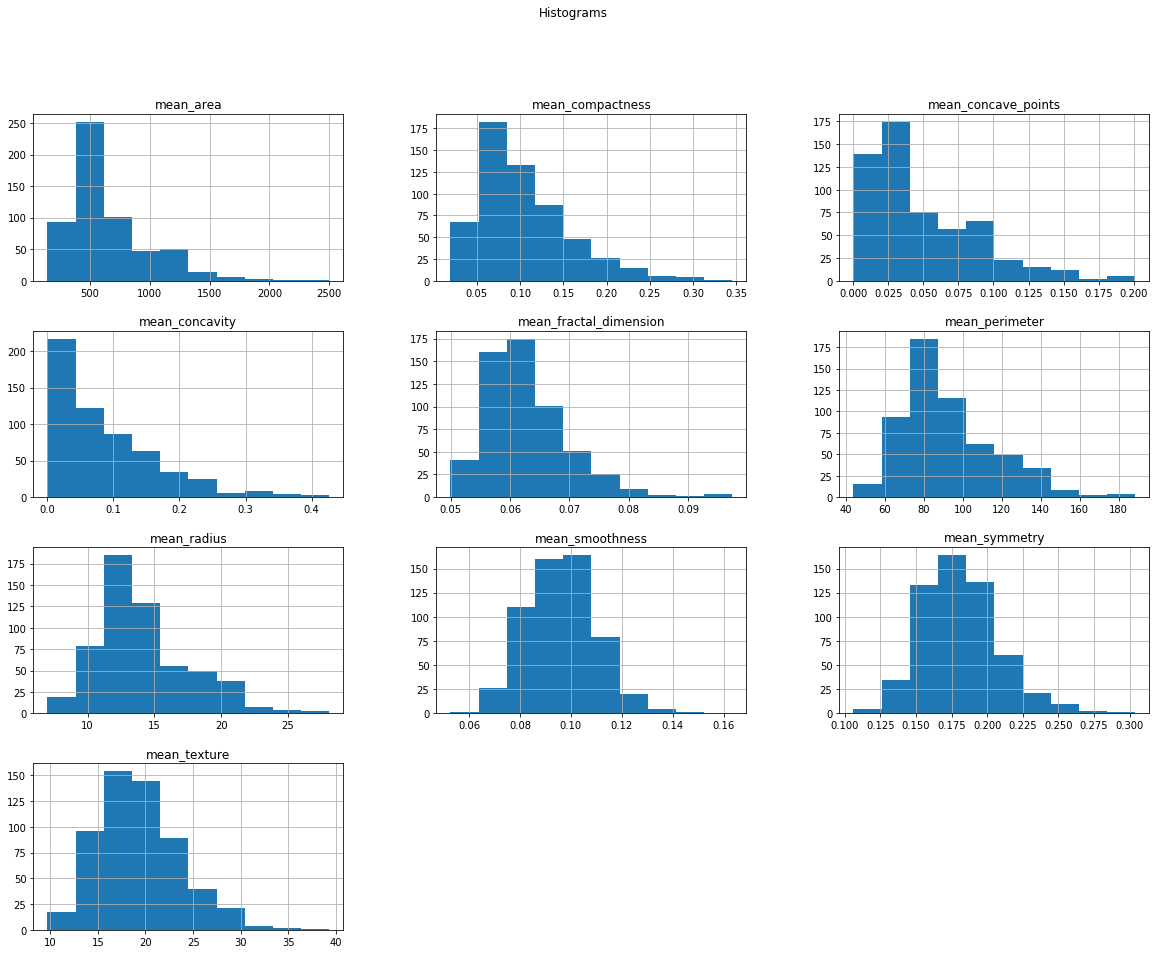

In [23]:
hist(meandf, 10,5)

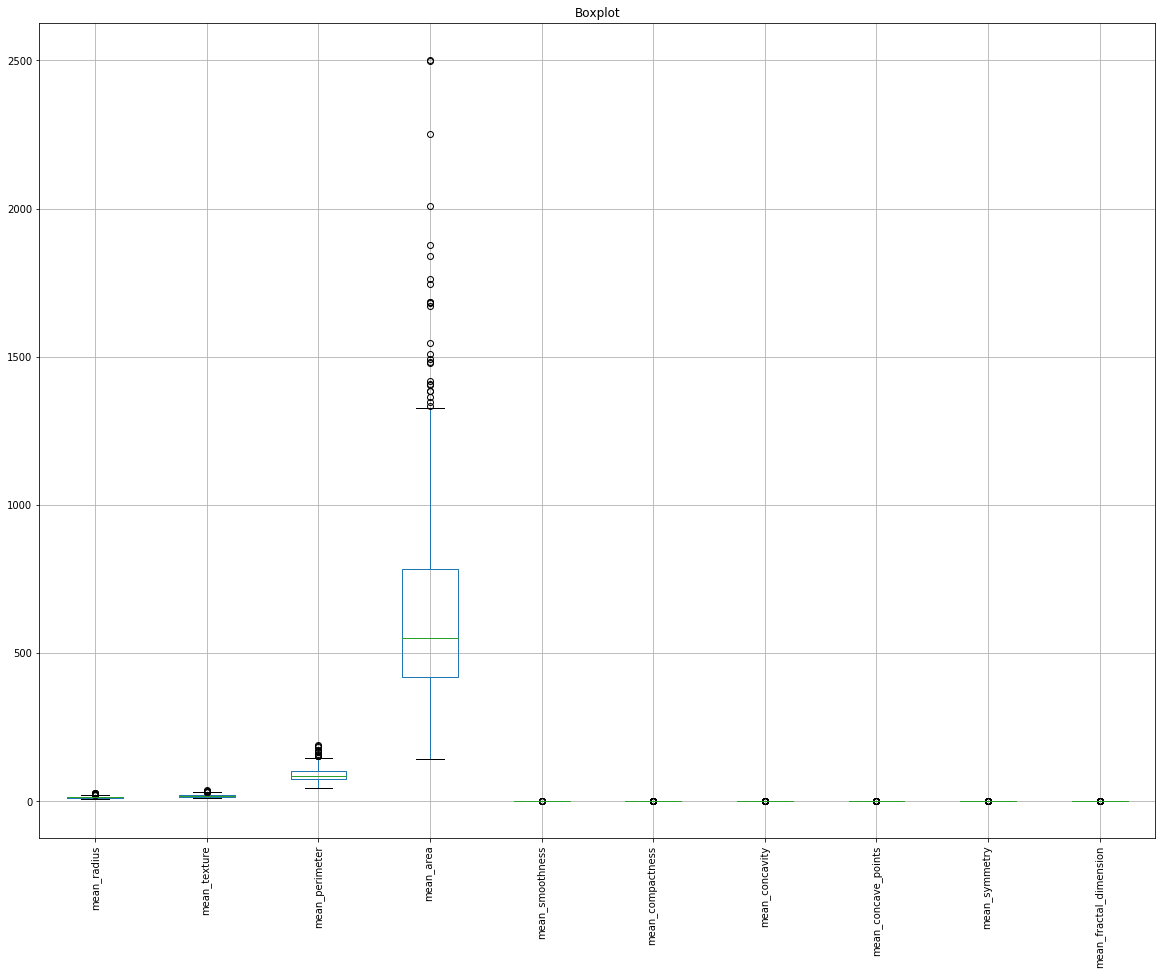

In [24]:
box_plot(meandf, 15,10)

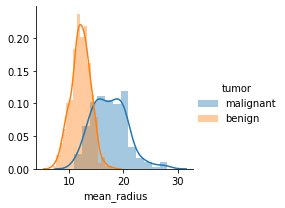

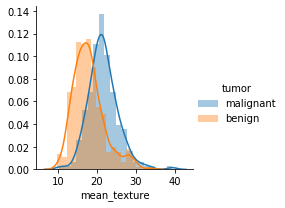

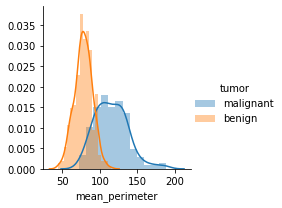

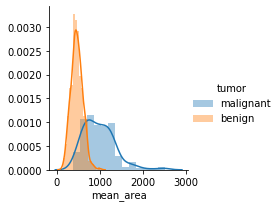

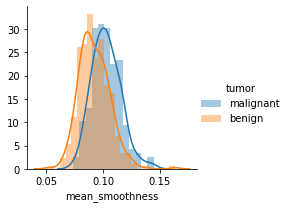

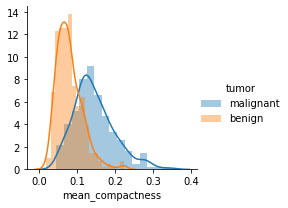

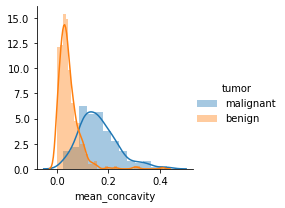

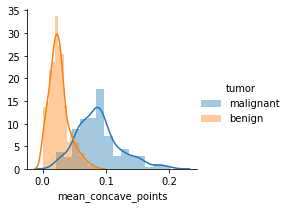

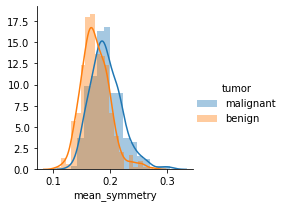

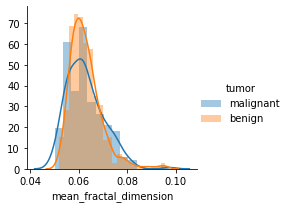

In [25]:
tables(meandf)

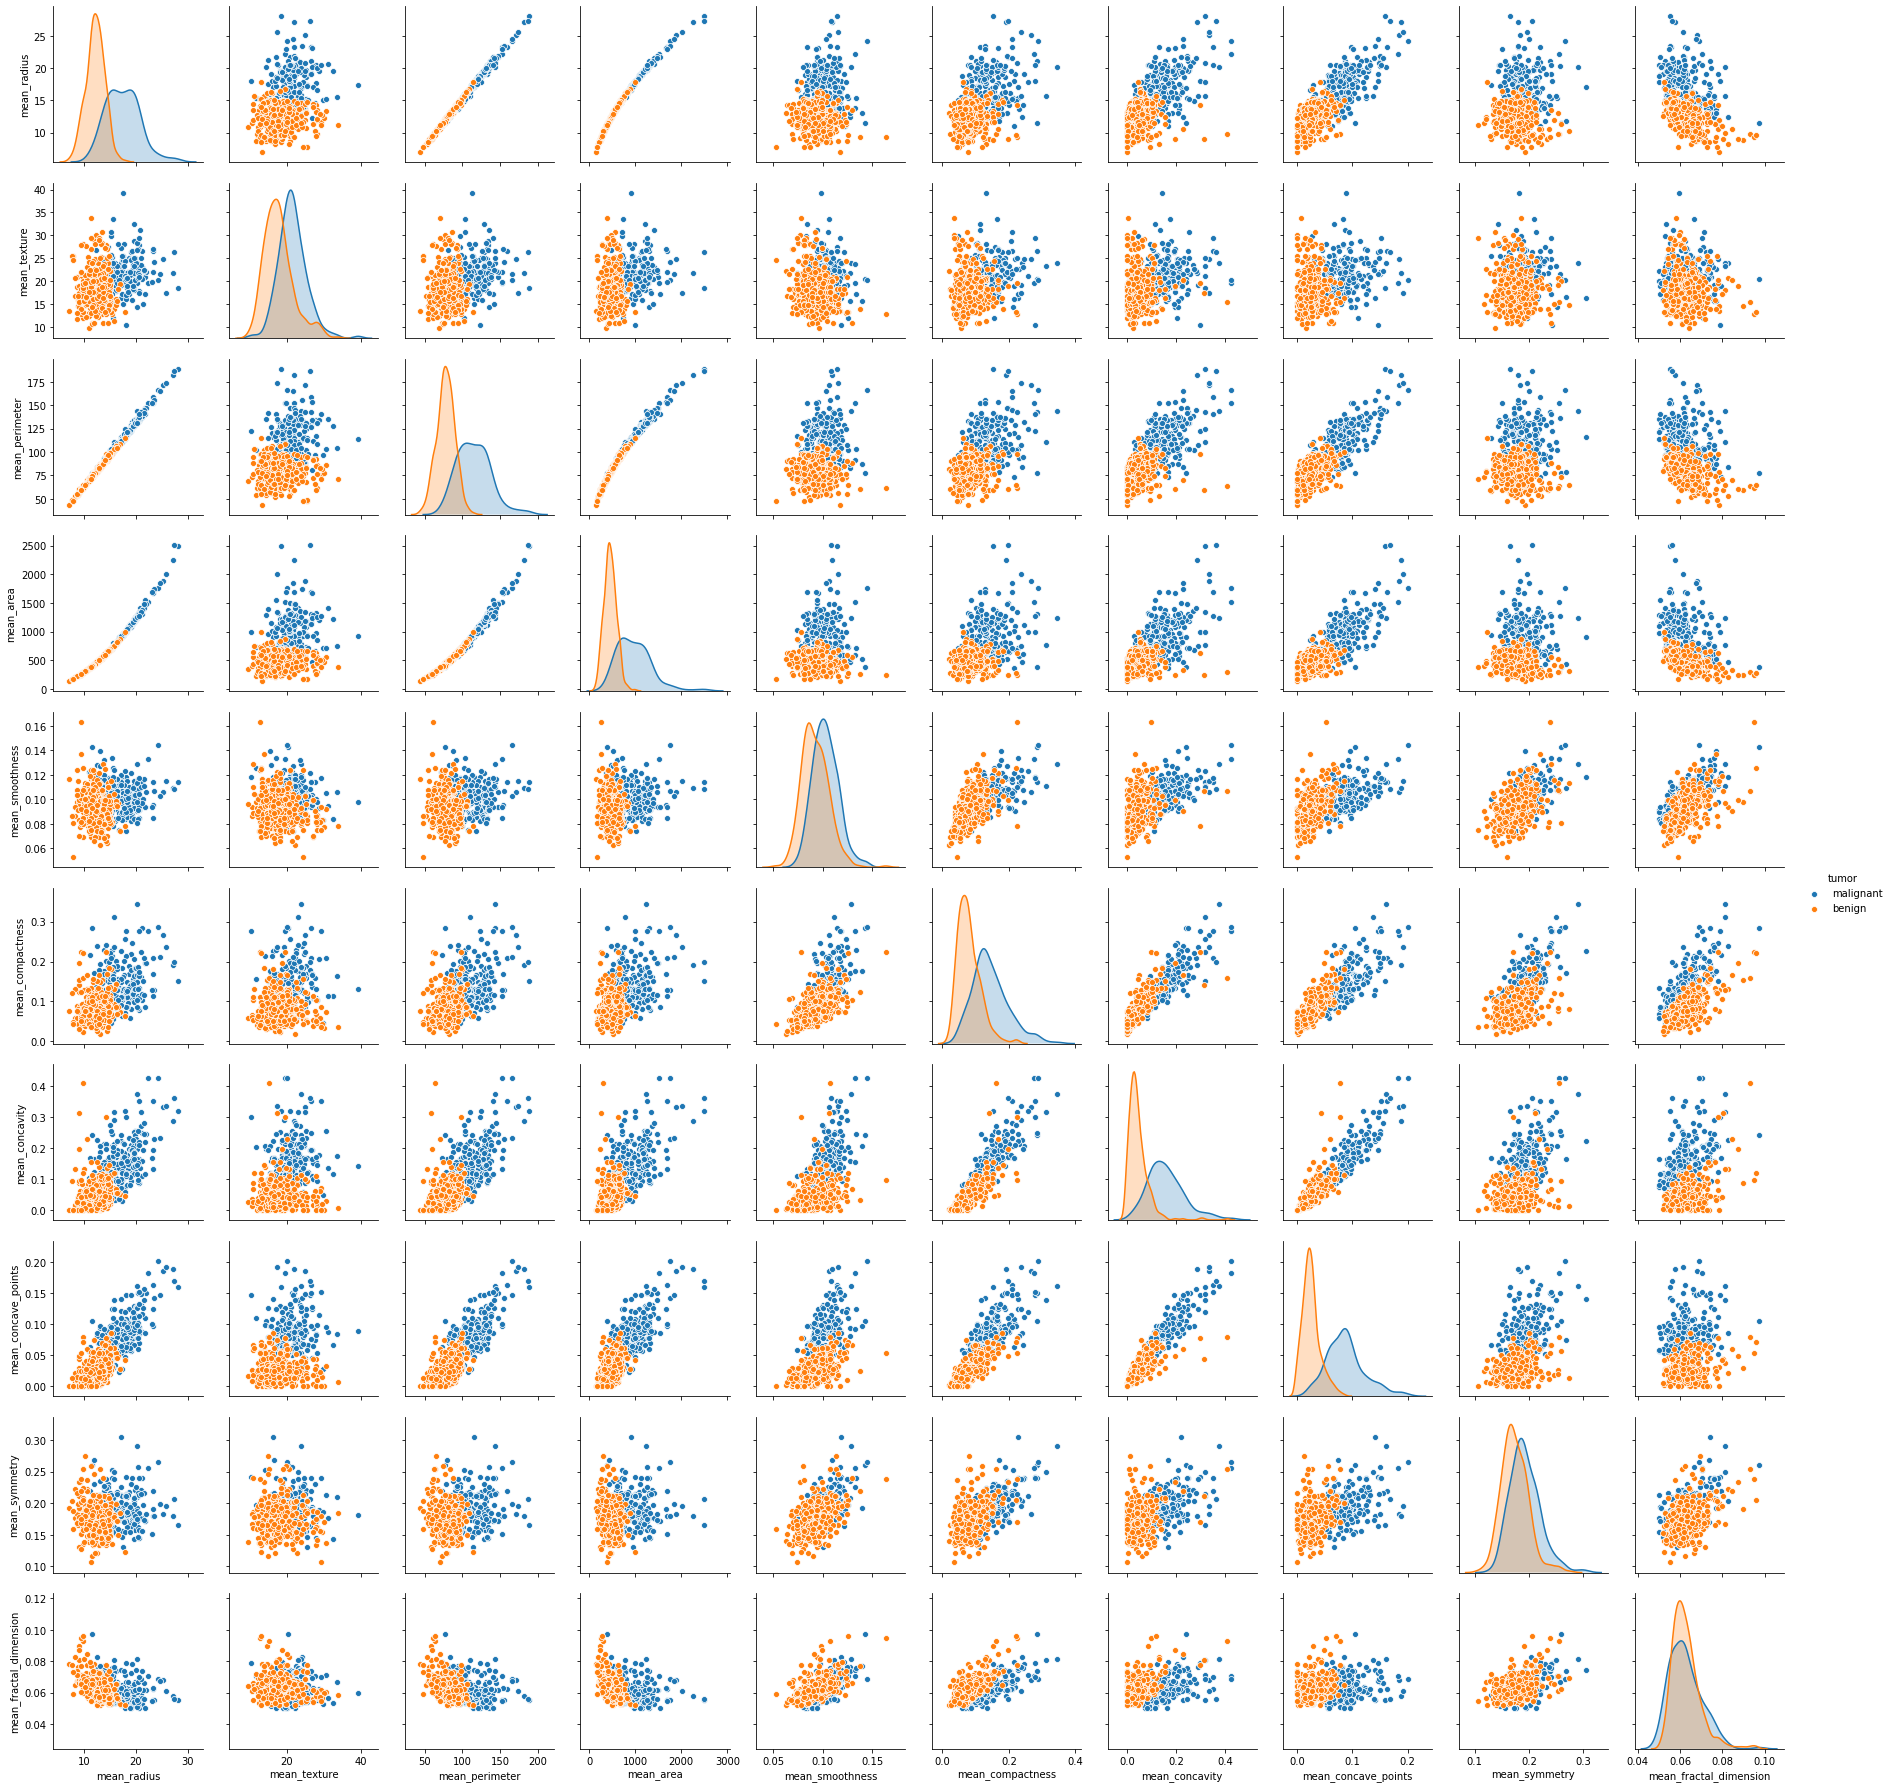

In [26]:
sns.pairplot(meandf, hue='tumor')
plt.show()

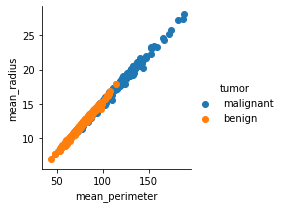

In [27]:
useful_corr(meandf,'tumor','mean_perimeter','mean_radius')

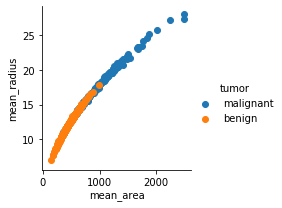

In [28]:
useful_corr(meandf,'tumor','mean_area','mean_radius')

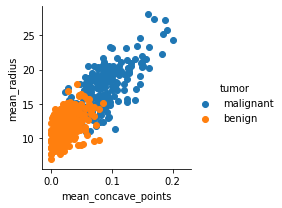

In [29]:
useful_corr(meandf,'tumor','mean_concave_points', 'mean_radius')

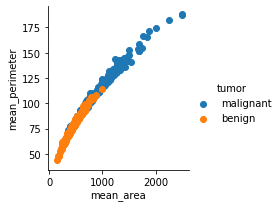

In [30]:
useful_corr(meandf, 'tumor', 'mean_area', 'mean_perimeter')

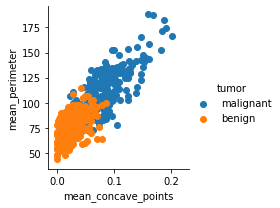

In [31]:
useful_corr(meandf, 'tumor', 'mean_concave_points', 'mean_perimeter')

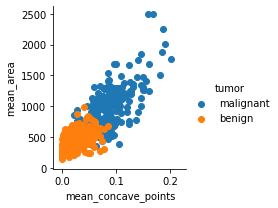

In [32]:
useful_corr(meandf, 'tumor', 'mean_concave_points', 'mean_area')

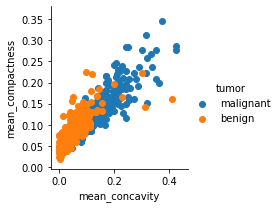

In [33]:
useful_corr(meandf, 'tumor', 'mean_concavity', 'mean_compactness')

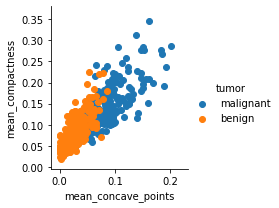

In [34]:
useful_corr(meandf, 'tumor', 'mean_concave_points', 'mean_compactness')

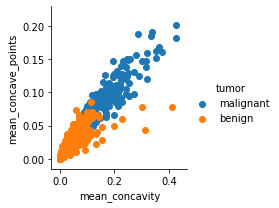

In [35]:
useful_corr(meandf, 'tumor', 'mean_concavity', 'mean_concave_points')

## Mean measurements conclusions
We can observe that mean radius, mean perimeter and mean area all have a relation with each other and we can classify them while looking at these. 
After those we can have a more general look to our tumors and agree that the bigger they are the more likely they are to be malignant.

### Error Filter

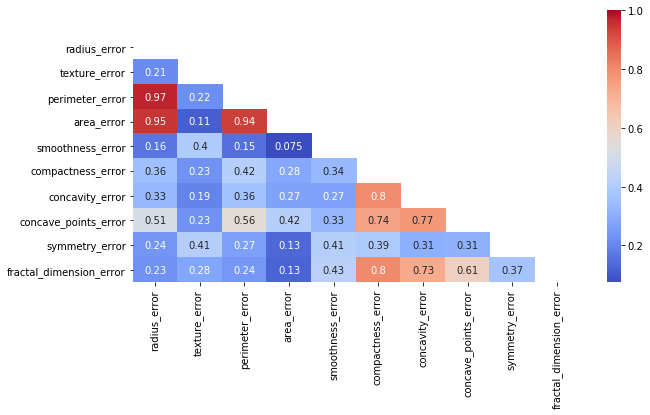

In [36]:
plot_corr(errordf,10,5)

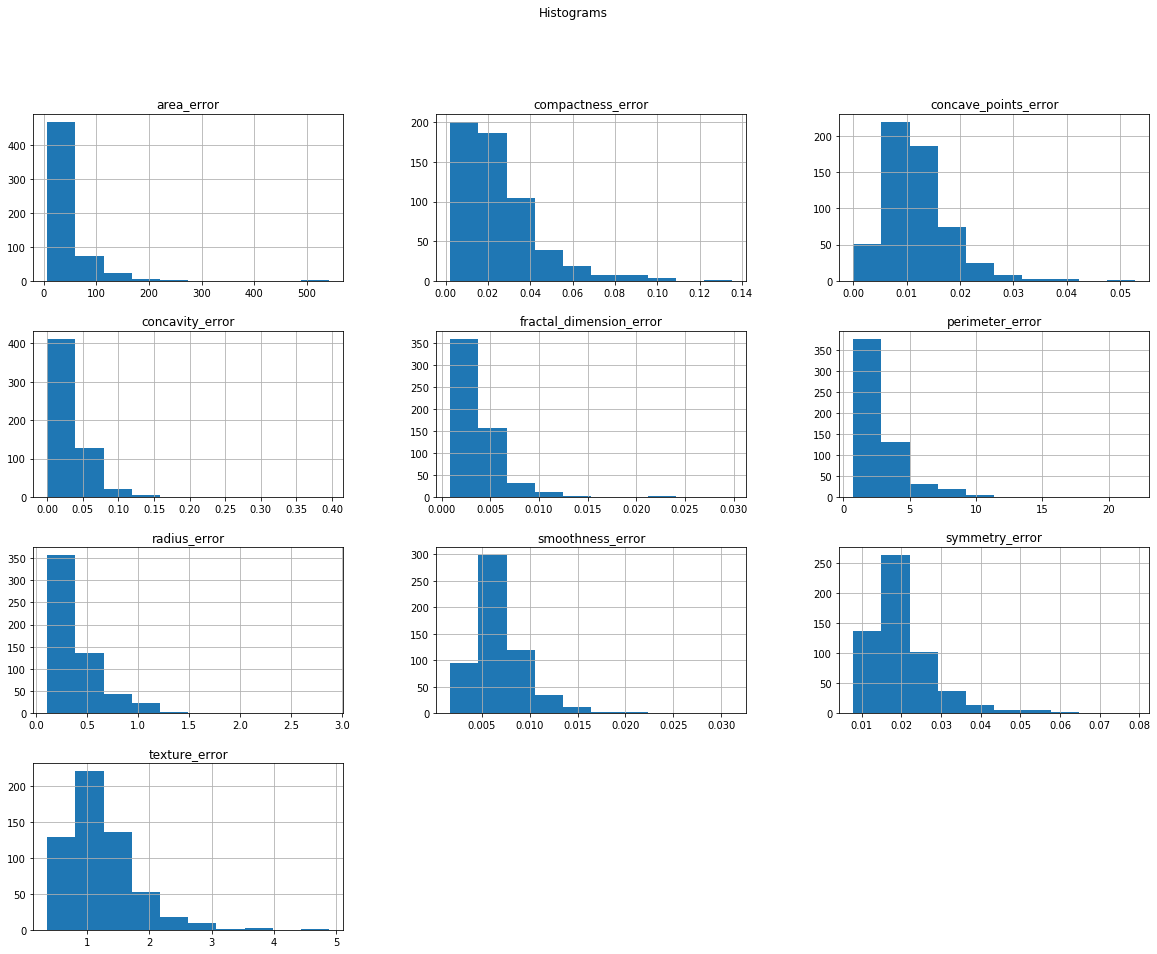

In [37]:
hist(errordf, 10,5)

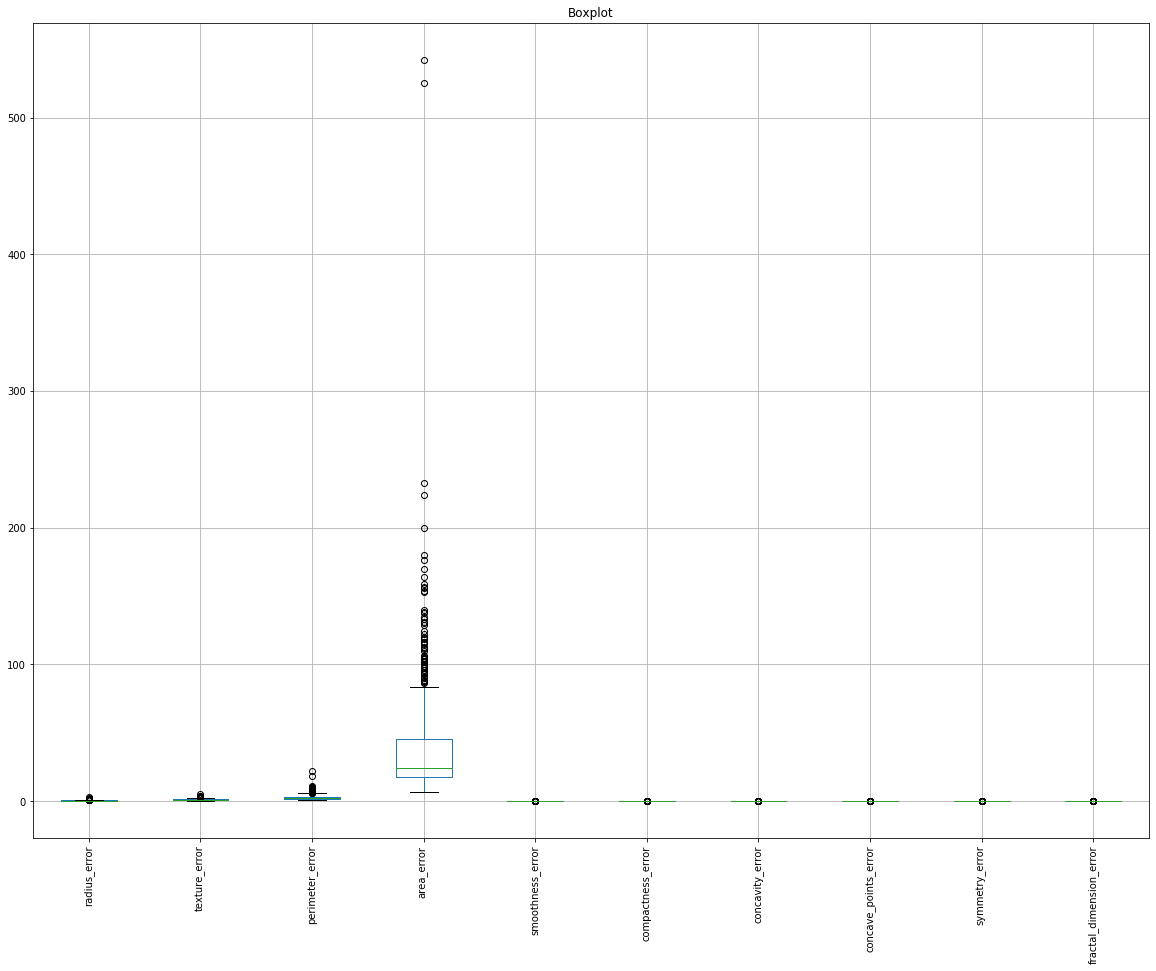

In [38]:
box_plot(errordf, 15,10)

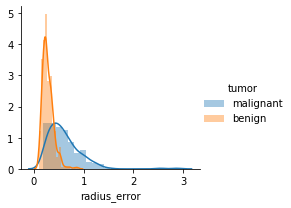

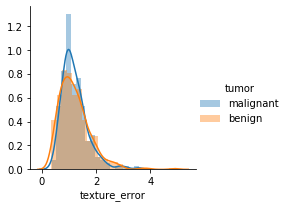

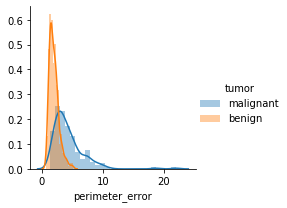

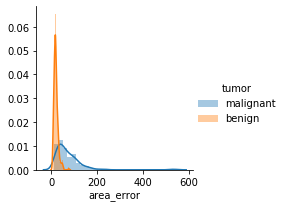

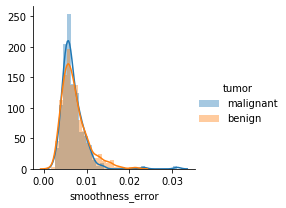

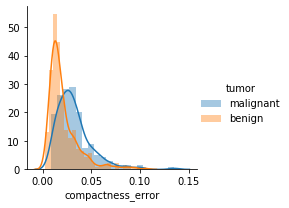

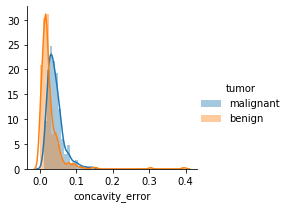

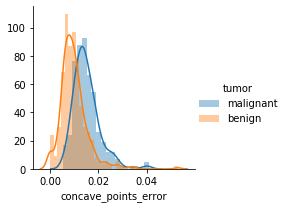

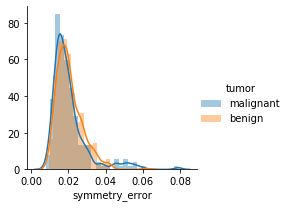

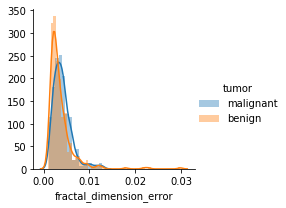

In [39]:
tables(errordf)

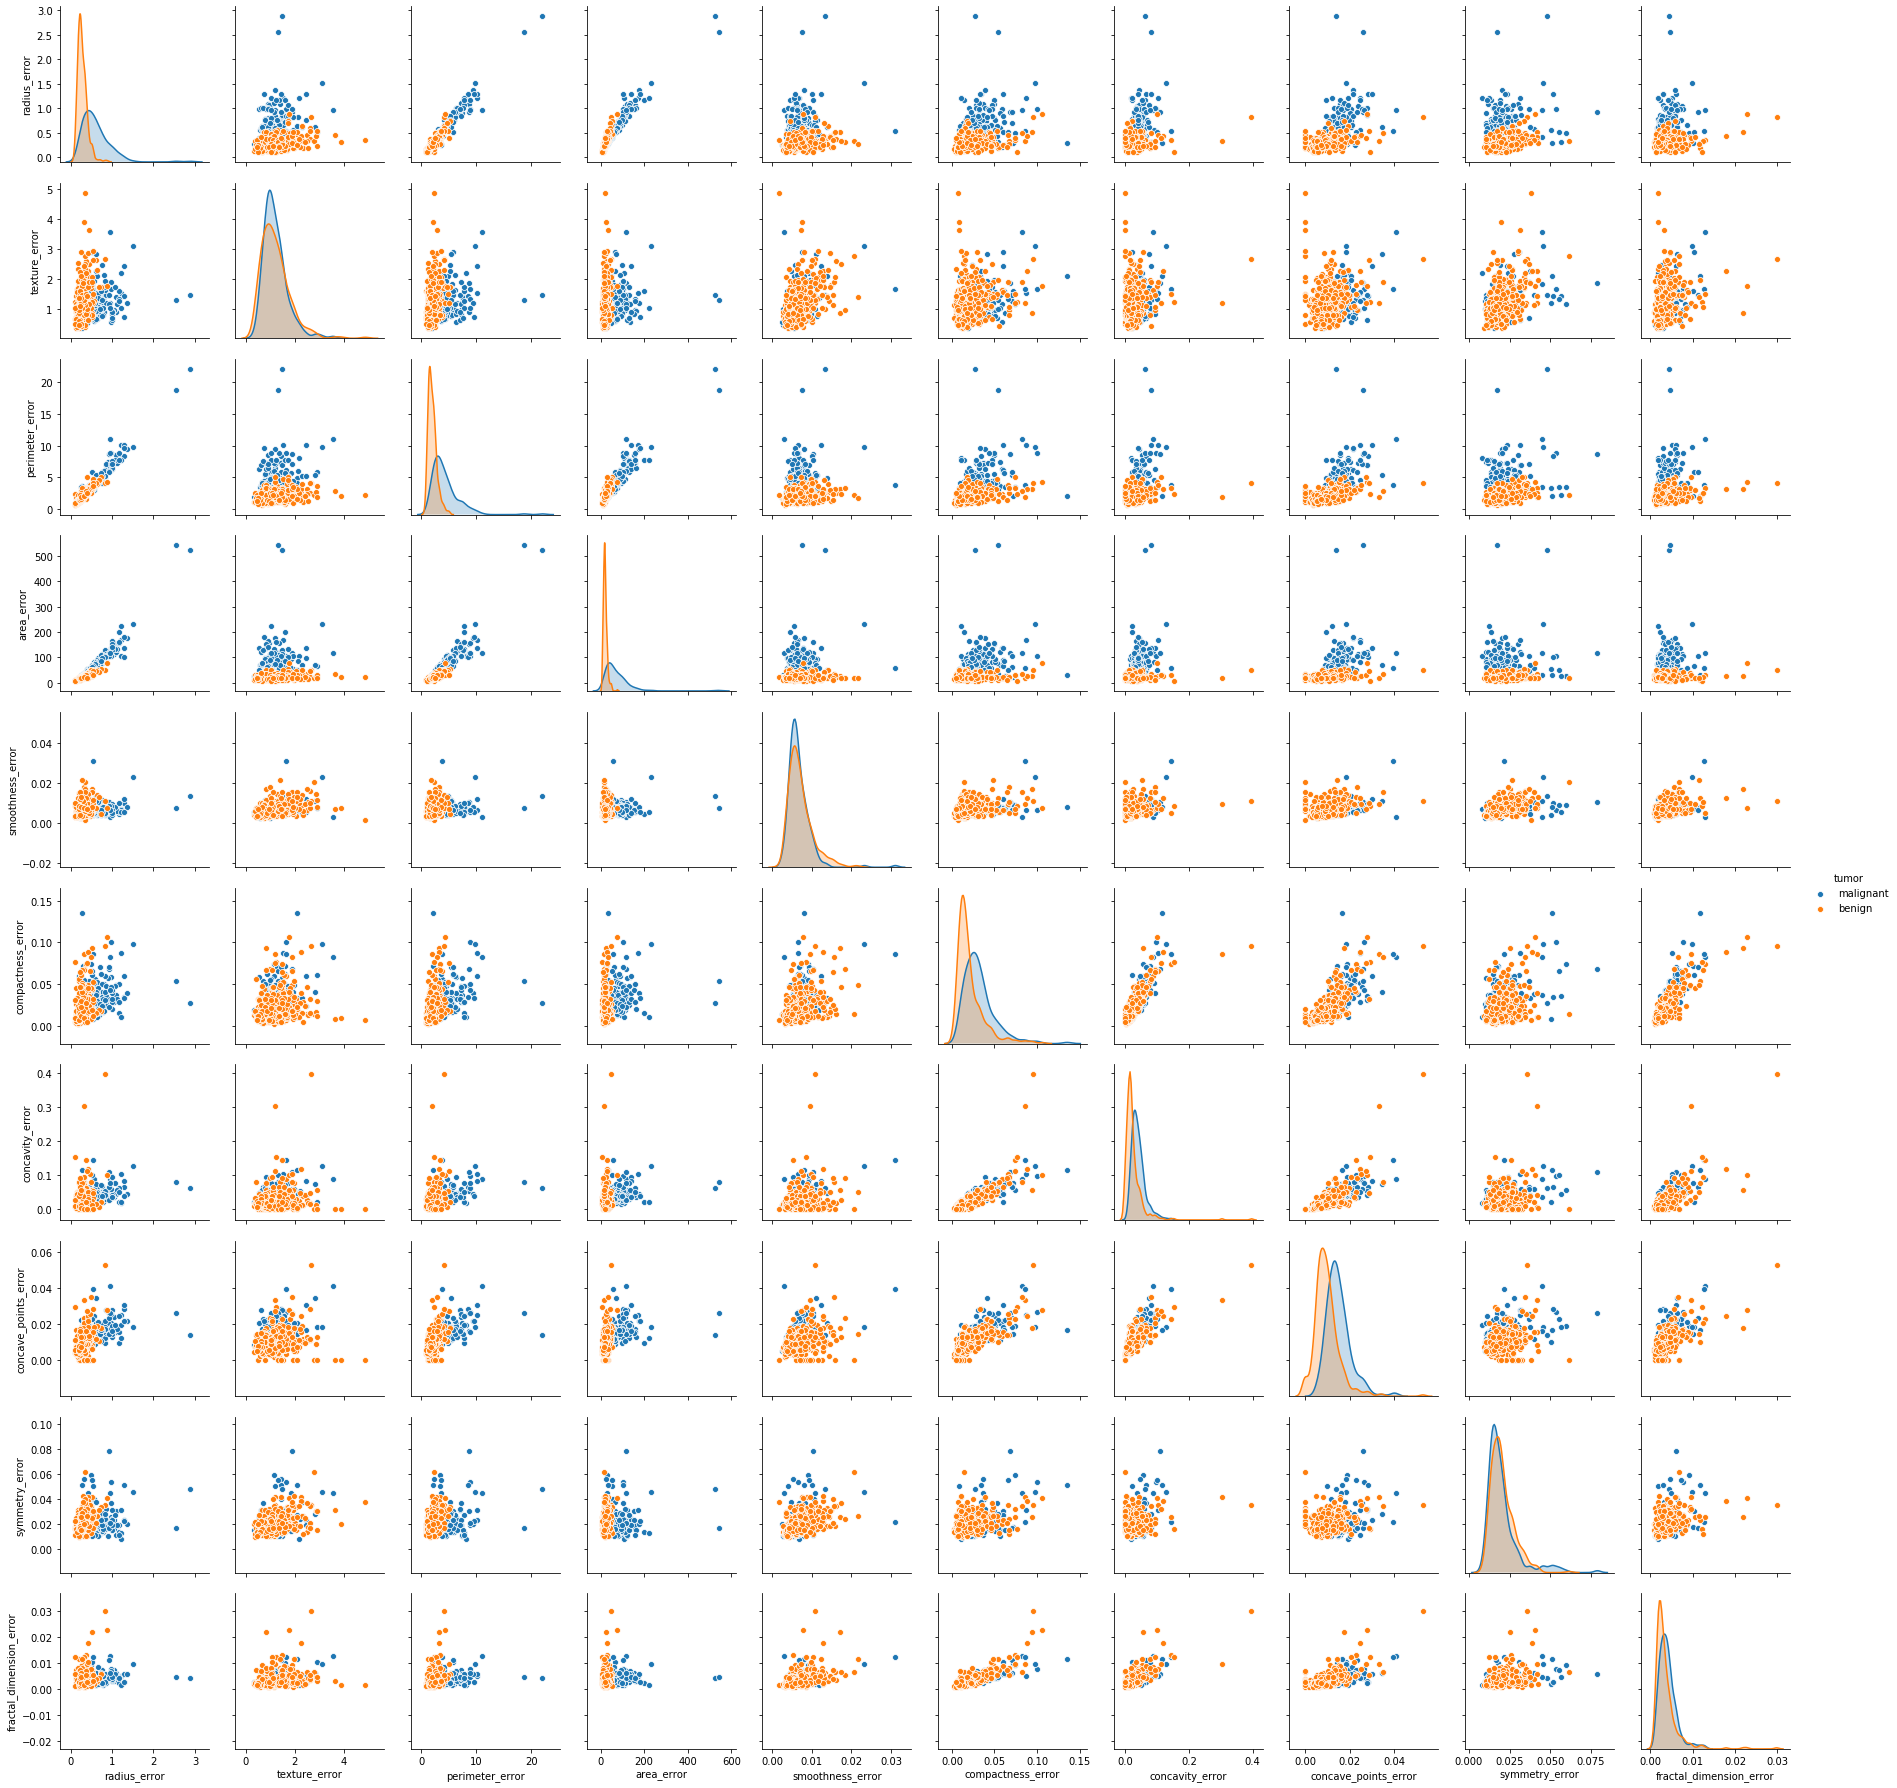

In [40]:
sns.pairplot(errordf, hue='tumor')
plt.show()

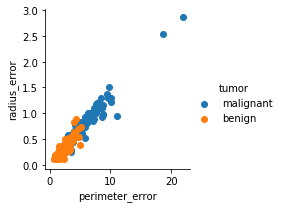

In [41]:
useful_corr(errordf, 'tumor', 'perimeter_error', 'radius_error')

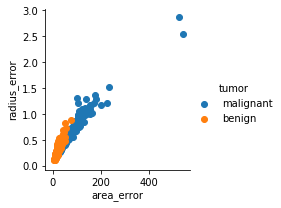

In [42]:
useful_corr(errordf, 'tumor', 'area_error', 'radius_error')

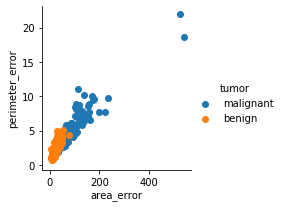

In [43]:
useful_corr(errordf, 'tumor', 'area_error', 'perimeter_error')

## Error measurements conclusions
We can observe that radius error, perimeter error and area error all have a relation with each other and we can classify them while looking at these. 
After those we can have a more general look to our tumors and agree that the bigger the errors are the tumors are  more likely to be malignant.

### Worse Filter

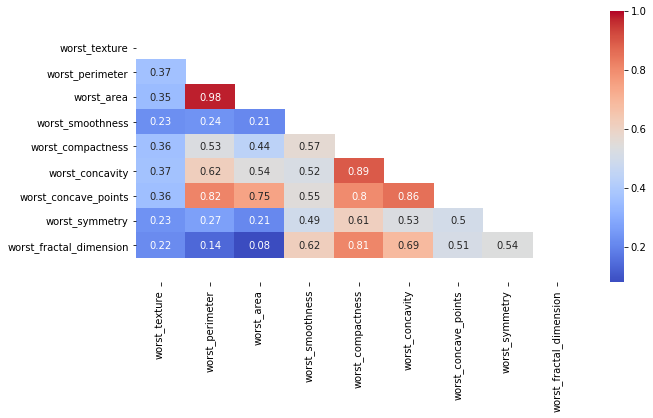

In [46]:
plot_corr(worsedf,10,5)

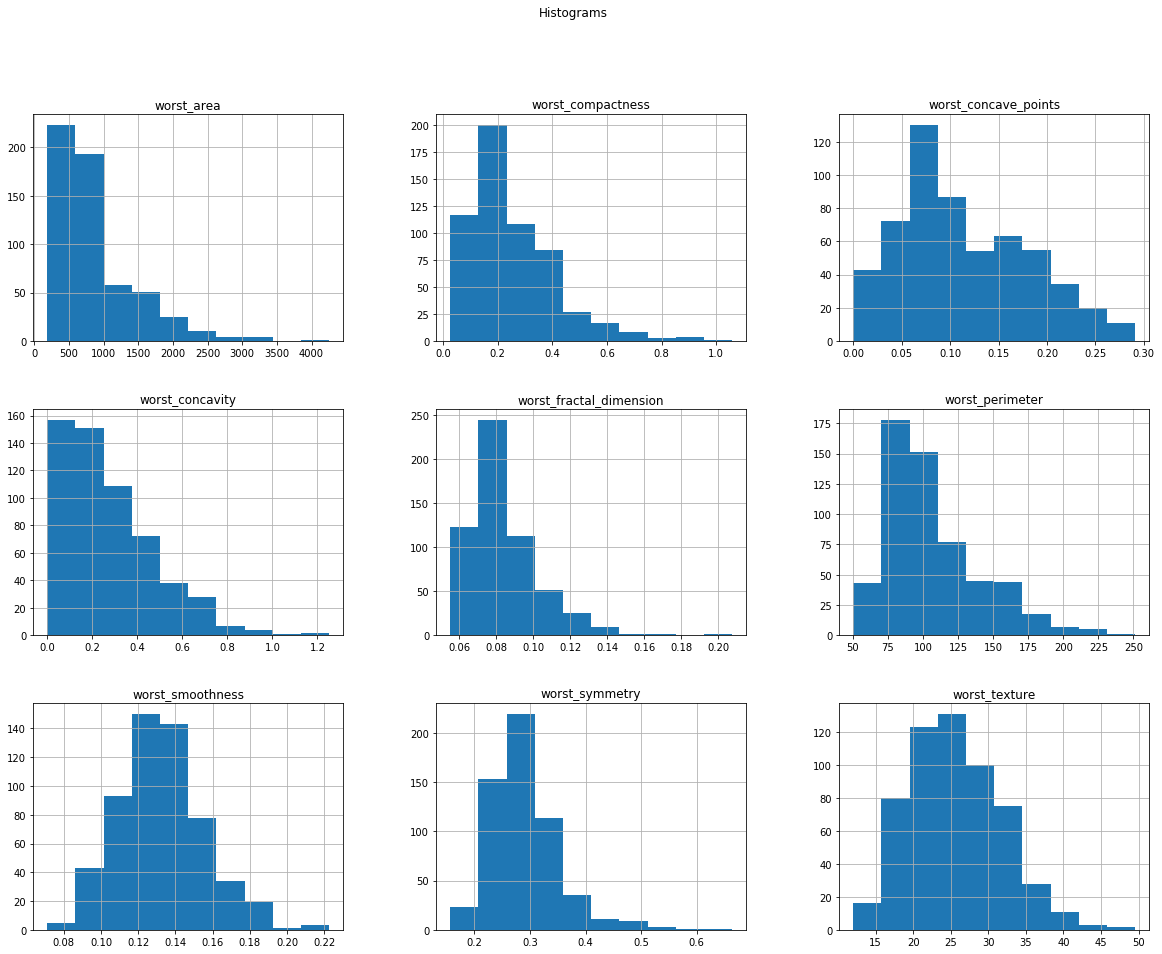

In [47]:
hist(worsedf, 10,5)

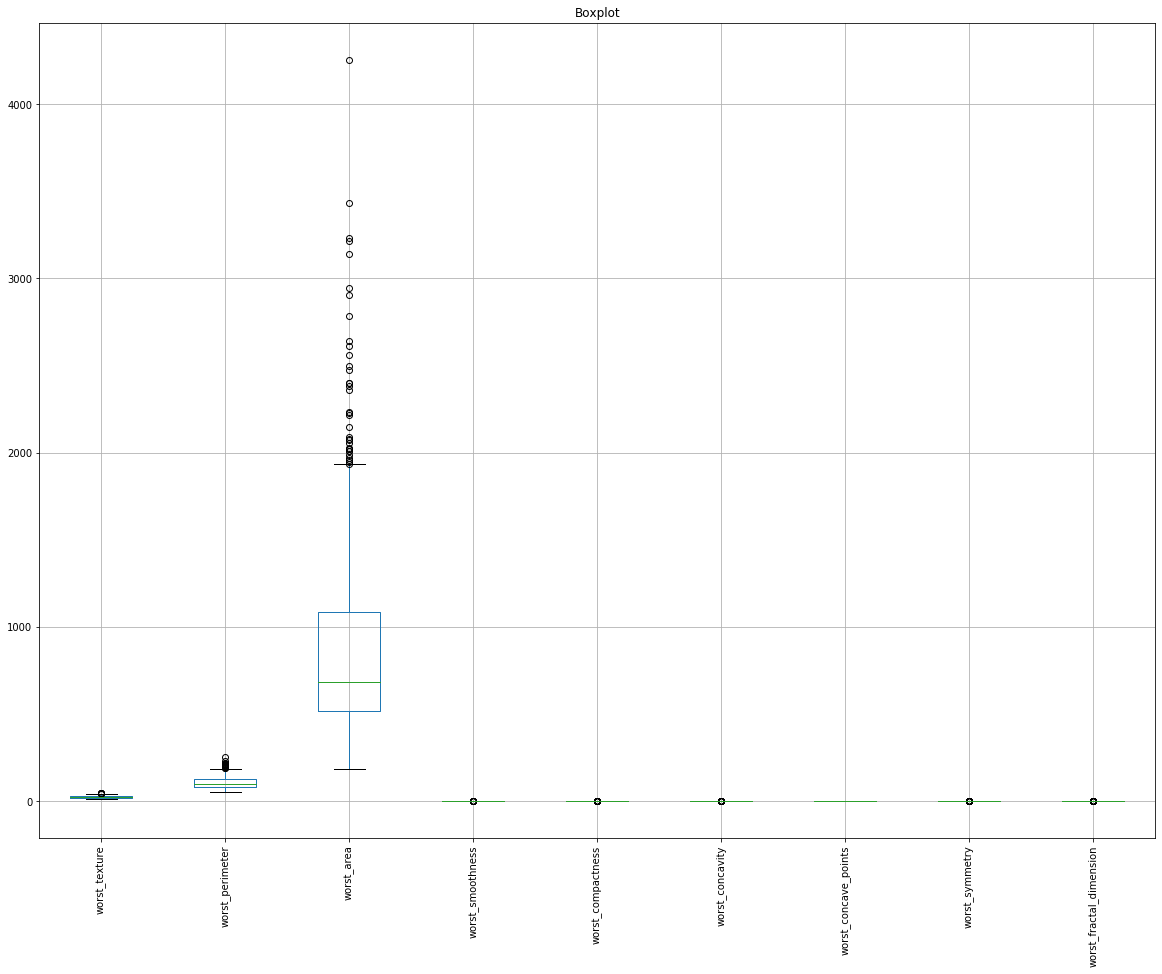

In [48]:
box_plot(worsedf, 10,5)

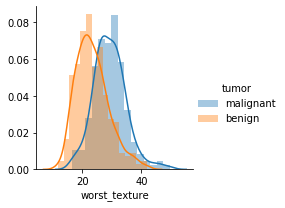

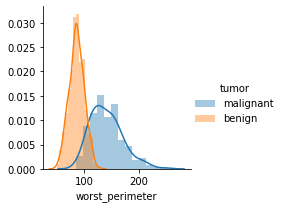

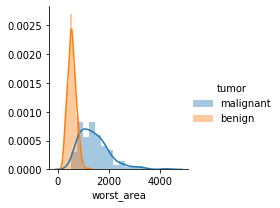

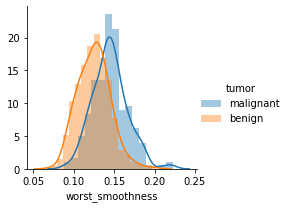

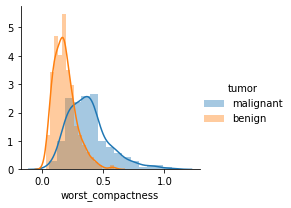

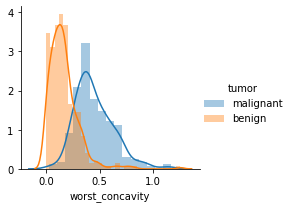

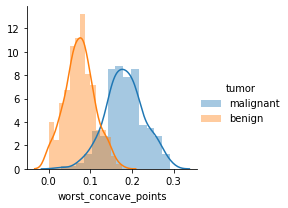

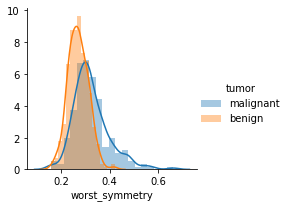

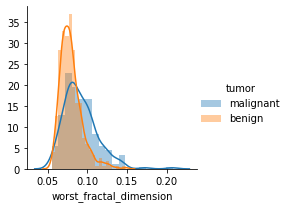

In [49]:
tables(worsedf)

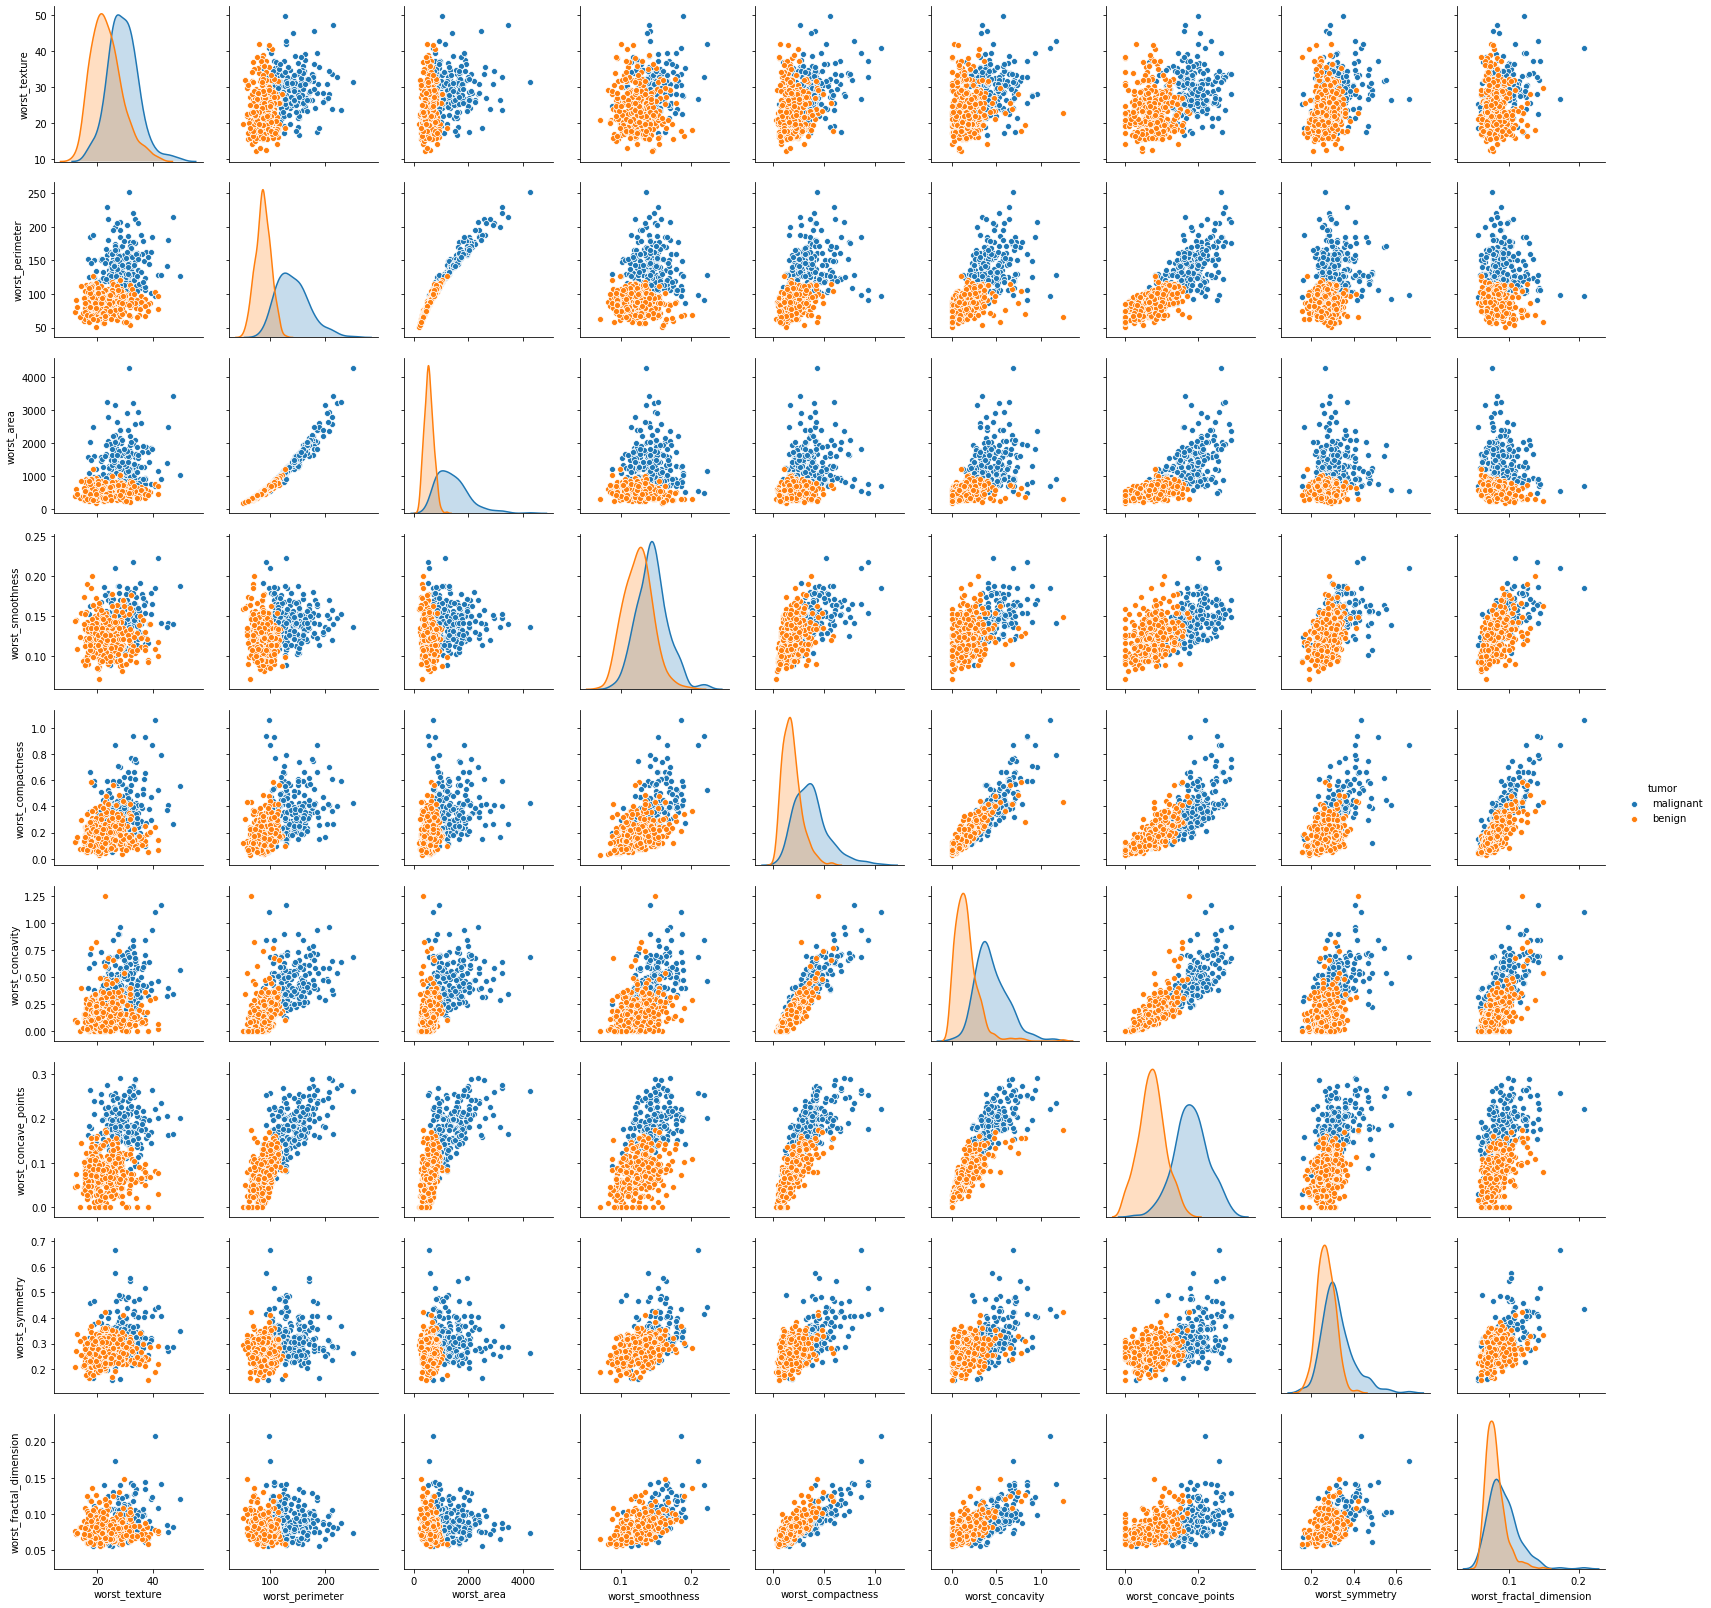

In [50]:
sns.pairplot(worsedf, hue='tumor')
plt.show()

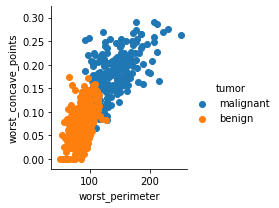

In [51]:
useful_corr(worsedf, 'tumor', 'worst_perimeter', 'worst_concave_points')

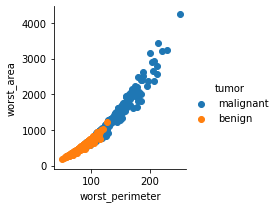

In [52]:
useful_corr(worsedf, 'tumor', 'worst_perimeter', 'worst_area')

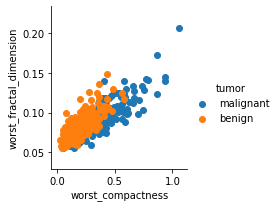

In [53]:
useful_corr(worsedf, 'tumor', 'worst_compactness', 'worst_fractal_dimension')

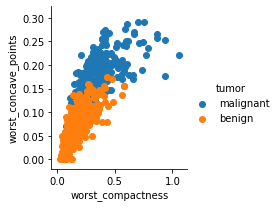

In [54]:
useful_corr(worsedf, 'tumor', 'worst_compactness', 'worst_concave_points')

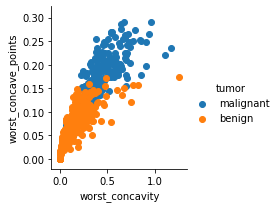

In [55]:
useful_corr(worsedf, 'tumor', 'worst_concavity', 'worst_concave_points')

## Conclusion